In [41]:
import pandas as pd #for dealing with csv import
import os # for joining paths and filenames sensibly
import numpy as np #for the population std
import glob # for finding csv data Çfiles

## Data processing

In [42]:
#Load data and get sheet names
filepath = 'C:\\Users\\david\\Documents\\Open Brains\\Balanced Brains\\diana_results\\test_feedback_f2.xlsx'
xl = pd.ExcelFile(filepath)
sheet_names = xl.sheet_names
print(sheet_names)

['G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10']


In [43]:
#Get summary dataframe

summary=[]

for idx, group in enumerate(sheet_names):
    
    df_gx = pd.read_excel(filepath, sheet_name=sheet_names[idx])
    
    if len(df_gx)>1: ## condition to have values in the group
        
        for idx1, label in enumerate(['càstig', 'recompensa', 'guiatge']): ##each feedback type
            
            points = df_gx.iloc[1:, 1+idx1][~df_gx.iloc[1:, 1+idx1].isnull()].values ## remove the nan and convert to array
            
            print([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ]) ##control mechanism
            
            summary.append([points.sum(), np.round(points.mean(),2), points.shape[0], label, group ])
            #
            
#
df = pd.DataFrame(summary)
df.columns=['sum', 'mean_points', '#thorws', 'feedback_type', 'group' ]    
            

[300.0, 30.0, 10, 'càstig', 'G01']
[510.0, 42.5, 12, 'recompensa', 'G01']
[780.0, 78.0, 10, 'guiatge', 'G01']
[400.0, 18.18, 22, 'càstig', 'G02']
[300.0, 12.0, 25, 'recompensa', 'G02']
[980.0, 37.69, 26, 'guiatge', 'G02']
[220.0, 14.67, 15, 'càstig', 'G03']
[440.0, 14.67, 30, 'recompensa', 'G03']
[930.0, 29.06, 32, 'guiatge', 'G03']
[270.0, 15.88, 17, 'càstig', 'G04']
[780.0, 31.2, 25, 'recompensa', 'G04']
[1150.0, 41.07, 28, 'guiatge', 'G04']
[830.0, 28.62, 29, 'càstig', 'G05']
[690.0, 22.26, 31, 'recompensa', 'G05']
[1290.0, 44.48, 29, 'guiatge', 'G05']
[240.0, 24.0, 10, 'càstig', 'G06']
[520.0, 24.76, 21, 'recompensa', 'G06']
[810.0, 42.63, 19, 'guiatge', 'G06']
[290.0, 19.33, 15, 'càstig', 'G07']
[440.0, 20.95, 21, 'recompensa', 'G07']
[880.0, 38.26, 23, 'guiatge', 'G07']
[220.0, 18.33, 12, 'càstig', 'G08']
[170.0, 14.17, 12, 'recompensa', 'G08']
[430.0, 35.83, 12, 'guiatge', 'G08']
[310.0, 34.44, 9, 'càstig', 'G09']
[400.0, 33.33, 12, 'recompensa', 'G09']
[90.0, 7.5, 12, 'guiatge'

In [44]:
df

,sum,mean_points,#thorws,feedback_type,group
0,300.0,30.00,10,càstig,G01
1,510.0,42.50,12,recompensa,G01
2,780.0,78.00,10,guiatge,G01
3,400.0,18.18,22,càstig,G02
4,300.0,12.00,25,recompensa,G02
5,980.0,37.69,26,guiatge,G02
6,220.0,14.67,15,càstig,G03
7,440.0,14.67,30,recompensa,G03
8,930.0,29.06,32,guiatge,G03
9,270.0,15.88,17,càstig,G04


## Plots

In [46]:
import matplotlib.pyplot as plt  # Matplotlib's pyplot: MATLAB-like syntax
import seaborn as sns
sns.set_context("talk")

In [47]:
c_guiatge =  '#e59500'
c_recompensa= 'aquamarine' # '#002642'
c_castig= 'indianred'  # '#840032'

Text(0.5, 1.0, 'Eficiència')

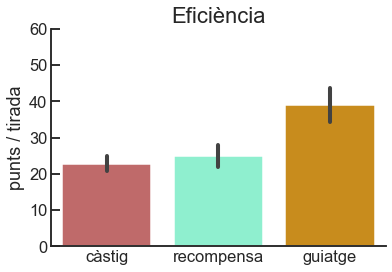

In [48]:
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,60)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22)

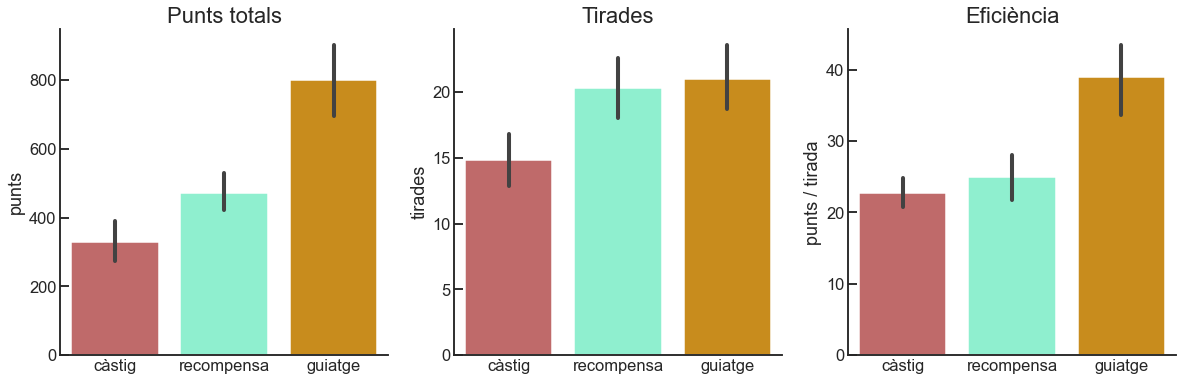

In [49]:
plt.figure(figsize=(20,6))

plt.subplot(131)
sns.barplot(data=df, x="feedback_type", y="sum", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts');
plt.title('Punts totals', fontsize=22)


plt.subplot(132)
sns.barplot(data=df, x="feedback_type", y="#thorws", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('tirades');
plt.title('Tirades', fontsize=22)


plt.subplot(133)
sns.barplot(data=df, x="feedback_type", y="mean_points", 
            order=['càstig', 'recompensa', 'guiatge'],
            ci=68,  palette=[c_castig, c_recompensa, c_guiatge])

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


In [50]:
from linares_plot import *

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


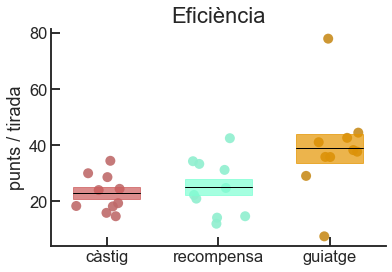

In [51]:
sns.set_context("talk")

linares_plot(x='feedback_type', y='mean_points', order=['càstig', 'recompensa', 'guiatge'], 
             df=df, palette=[c_castig, c_recompensa, c_guiatge], CI=0.68,  fill_box=True, by_subj=True, subj_col='group', 
             reps=500, alpha_box=0.7, alpha=0.9,  point_size=10, leg=False, sep_axis=False)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_ylim(0,80)
plt.xlabel('')
plt.ylabel('punts / tirada');
plt.title('Eficiència', fontsize=22);


## Stats

In [52]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [53]:
###### Anova model
mod = ols(formula='mean_points ~ feedback_type', data=df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print( '                                 ')
print( '                                 Anova Table')
print( '==============================================================================')
print( aov_table)
print( '==============================================================================')
print( '                                 ')
print( '                                 ')
print( '                                 ')

####### Multiple comparisons
tukey = pairwise_tukeyhsd(endog=df['mean_points'].values, groups=df['feedback_type'].values,  alpha=0.05)
print( tukey.summary()    )



                                 
                                 Anova Table
                    sum_sq    df        F    PR(>F)
feedback_type  1550.843547   2.0  5.24435  0.011906
Residual       3992.179590  27.0      NaN       NaN
                                 
                                 
                                 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
 càstig    guiatge   16.242 0.0158   2.759 29.725   True
 càstig recompensa    2.224 0.9122 -11.259 15.707  False
guiatge recompensa  -14.018 0.0404 -27.501 -0.535   True
--------------------------------------------------------
